# <center> Les facteurs sur la qualité du sommeil 

L'objectif de l'analyse est de trouver les facteurs influençant la qualité du sommeil. Ainsi nous avons un dataset comportant différentes données :
* Mesures du sommeil : la durée du sommeil, la qualité 
* Facteurs liés au mode de vie : Niveaux d'activité physique, les niveaux de stress et les catégories d'IMC.
* Santé cardiovasculaire : Examinez les mesures de la pression artérielle et de la fréquence cardiaque.
* Troubles du sommeil : l'insomnie et l'apnée du sommeil.


# 1. Introduction

## 1.1 les libraries utilisées

In [108]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1.2 Data

In [109]:
# Affecter une variable avec le chemin vers le dossier
path = "C:/Users/maimo/Documents/Sommeil/"
os.listdir(path)  # methode affichant tous les fichiers contenus dans notre dossier

['Sleep_health_and_lifestyle_dataset.csv']

In [110]:
path=path+'Sleep_health_and_lifestyle_dataset.csv'

In [111]:
sommeil = pd.read_csv(path)
sommeil.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [112]:
sommeil.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

* Person ID : Identifiant de la personne
* Gender : Genre 
* Occupation : Travail
* Sleep Duration : Durée du sommeil
* Quality of Sleep : Qualité du sommeil
* Physical Activity Level : Niveau d'activité sportif
* Stress Level : Niveau de stress
* BMI Category : Catégorie de IMC
* Blood Pressure : Tension artérielle
* Heart Rate : Fréquence cardiaque
* Daily Steps : Nombre de pas quotidien
* Sleep Disorder : Problème de sommeil

In [113]:
sommeil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Nous avons aucune valeur manquante à l'exception de Sleep Disorder, qui correspond aux troubles du sommeil, avec 219 valeurs manquantes. Or d'après le créateur du dataset, les valeurs manquantes signifient que la personne ne possède aucun troubles du sommeil.

# 2. Nettoyage du data

In [114]:
sommeil_origin=sommeil.copy() # garder une copy de sans modification

## 2.1 Renommer les colonnes

In [115]:
sommeil.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [116]:
nouvelle_colonnes={'Person ID' :'Identifiant',
                   'Gender': 'Genre',
                   'Age': 'Age',
                   'Occupation': 'Travail',
                   'Sleep Duration':'Duree du sommeil',
                   'Quality of Sleep' : 'Qualite du sommeil',
                   'Physical Activity Level': 'Niveau activite physique',
                   'Stress Level' : 'Niveau stress',
                   'BMI Category':'Categorie de IMC',
                   'Blood Pressure':'Frequence cardiaque',
                   'Heart Rate':'Tension arterielle',
                   'Daily Steps':'Nombre de pas quotidien',
                    'Sleep Disorder':'Trouble du sommeil'}


In [117]:
sommeil = sommeil.rename(columns=nouvelle_colonnes)
sommeil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Identifiant               374 non-null    int64  
 1   Genre                     374 non-null    object 
 2   Age                       374 non-null    int64  
 3   Travail                   374 non-null    object 
 4   Duree du sommeil          374 non-null    float64
 5   Qualite du sommeil        374 non-null    int64  
 6   Niveau activite physique  374 non-null    int64  
 7   Niveau stress             374 non-null    int64  
 8   Categorie de IMC          374 non-null    object 
 9   Frequence cardiaque       374 non-null    object 
 10  Tension arterielle        374 non-null    int64  
 11  Nombre de pas quotidien   374 non-null    int64  
 12  Trouble du sommeil        155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## 2.2 Colonne avec le bon type de données

La colonne Identifiant étant une chaîne de caractère à l'origine nous devons convertir cette colonne.

In [118]:
sommeil['Identifiant']=sommeil['Identifiant'].astype(str)
sommeil['Identifiant'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 374 entries, 0 to 373
Series name: Identifiant
Non-Null Count  Dtype 
--------------  ----- 
374 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


## 2.3 Traduire les valeurs en français

In [119]:
cols_objet = sommeil.select_dtypes( exclude=np.number).columns  # les colonnes non numériques
cols_objet

Index(['Identifiant', 'Genre', 'Travail', 'Categorie de IMC',
       'Frequence cardiaque', 'Trouble du sommeil'],
      dtype='object')

### 2.3.1 Genre

In [120]:
sommeil['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [121]:
sommeil['Genre']=sommeil['Genre'].replace(['Male', 'Female'],['Homme', 'Femme'])
sommeil['Genre'].unique()

array(['Homme', 'Femme'], dtype=object)

### 2.3.2 Travail

In [122]:
sommeil['Travail'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [123]:
sommeil['Travail']=sommeil['Travail'].replace(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
           'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer','Salesperson', 'Manager'],
           ["Ingénieur logiciel", "Médecin", "Représentant commercial", "Enseignant",
           'Infirmier', 'Ingénieur', 'Comptable', 'Scientifique', 'Avocat',
           'Vendeur', 'Manager']                 
            )

In [124]:
sommeil['Travail'].unique()

array(['Ingénieur logiciel', 'Médecin', 'Représentant commercial',
       'Enseignant', 'Infirmier', 'Ingénieur', 'Comptable',
       'Scientifique', 'Avocat', 'Vendeur', 'Manager'], dtype=object)

### 2.3.3 Catégorie de IMC

In [125]:
sommeil['Categorie de IMC'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [126]:
sommeil['Categorie de IMC']=sommeil['Categorie de IMC'].replace(['Overweight', 'Normal', 'Obese', 'Normal Weight'],
                                                  ["Surpoids", "Normal", "Obèse", "Poids normal"])


In [127]:
sommeil['Categorie de IMC'].unique()

array(['Surpoids', 'Normal', 'Obèse', 'Poids normal'], dtype=object)

### 2.3.4 Fréquence cardiaque

In [128]:
sommeil['Frequence cardiaque'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

il a rien à nettoyer pour la fréquence

### 2.3.5 Trouble du sommeil

In [130]:
sommeil['Trouble du sommeil'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [131]:
sommeil['Trouble du sommeil']=sommeil['Trouble du sommeil'].replace(['Sleep Apnea', 'Insomnia'],
                                                                    ["Apnée du sommeil", "Insomnie"])
sommeil['Trouble du sommeil'].unique()

array([nan, 'Apnée du sommeil', 'Insomnie'], dtype=object)

# 2. Analyse

## 2.0 L'échantillon

### 2.0.1 Nombre d'individus

In [132]:
sommeil['Identifiant'].nunique()

374

### 2.0.2 Genre et l'âge

<Figure size 1200x800 with 0 Axes>

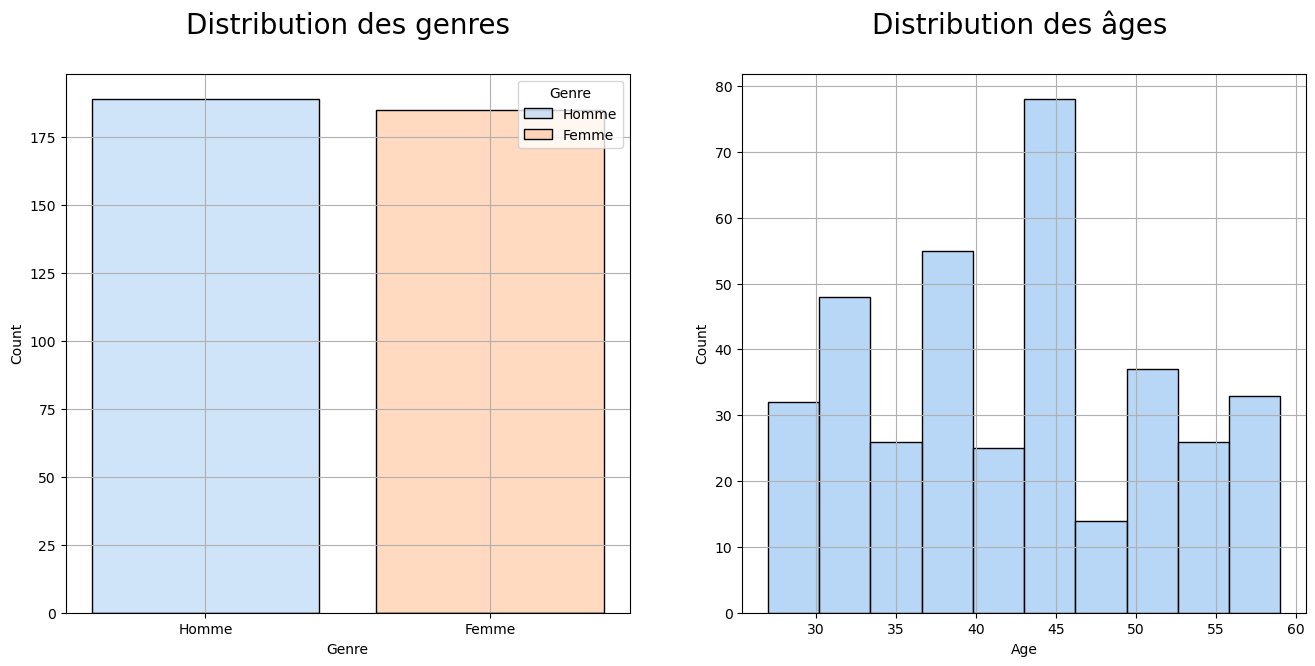

In [133]:
# graphe
plt.figure(figsize=(12, 8))
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
# distribution
sns.histplot(data=sommeil, x='Genre',hue='Genre', shrink=.8, ax=axs[0])
# distrubution avec logarithme népérien
sns.histplot(data=sommeil, x='Age', ax=axs[1])

axs[0].grid()
axs[1].grid()

axs[0].set_title("Distribution des genres\n", fontsize=20)
axs[1].set_title("Distribution des âges \n", fontsize=20)
plt.show()

In [134]:
print("Age maximale :",max(sommeil['Age']))
print("Age minimale :",min(sommeil['Age']))

Age maximale : 59
Age minimale : 27


### 2.0.3 Categorie de IMC

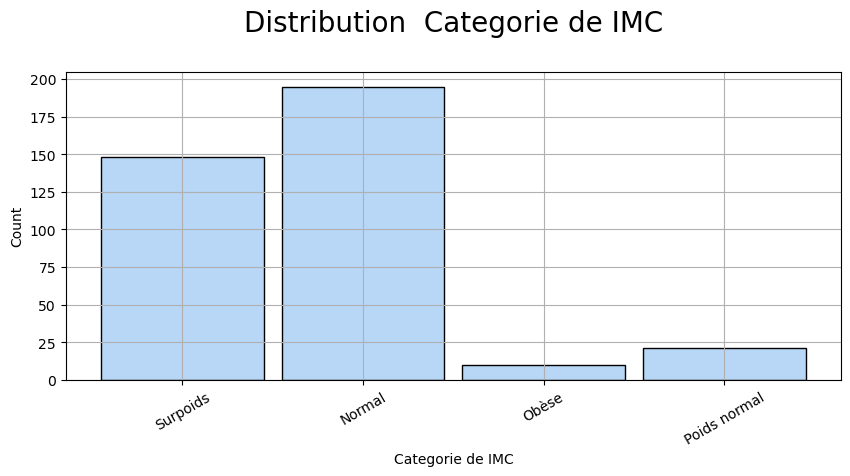

In [135]:
plt.figure(figsize=(10,4))
sns.set_palette('pastel')
sns.histplot(data=sommeil, x='Categorie de IMC',shrink=.9)
plt.xticks(
    rotation=30
)  # la position des nom axes des abscisses du graphe sont à la verticale
plt.title("Distribution  Categorie de IMC\n", fontsize=20)
plt.grid()

### 2.0.4 Travail

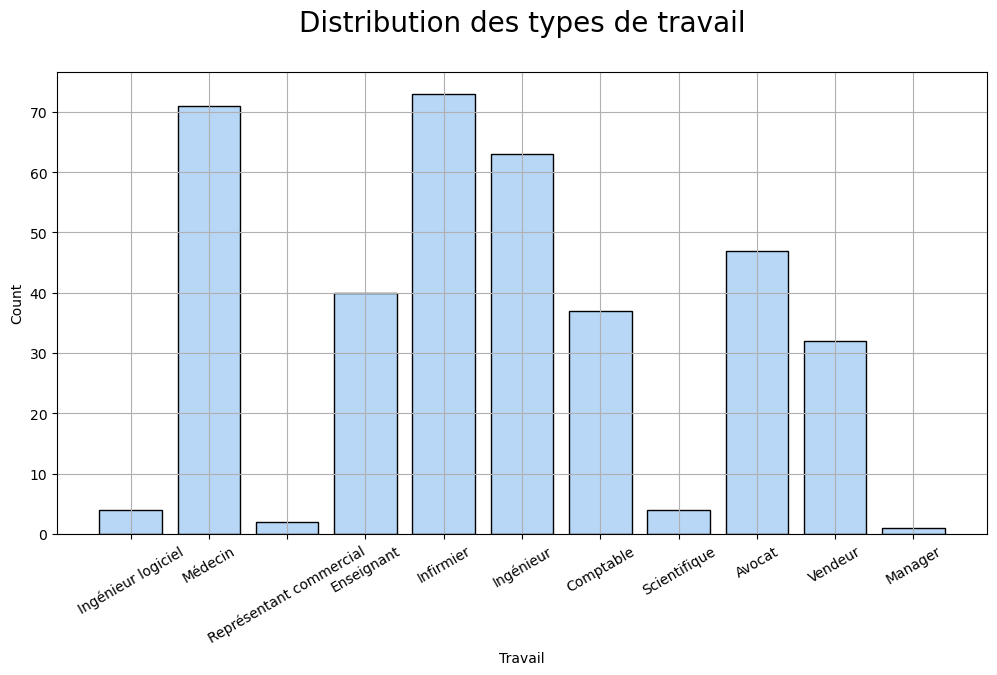

In [136]:
plt.figure(figsize=(12,6))
sns.set_palette('pastel')
sns.histplot(data=sommeil, x='Travail',shrink=.8)
plt.xticks(
    rotation=30
)  # la position des nom axes des abscisses du graphe sont à la verticale
plt.title("Distribution des types de travail\n", fontsize=20)
plt.grid()

## 2.1 Corrélation entre valeurs numériques

### 2.1.1 Matice de corrélation

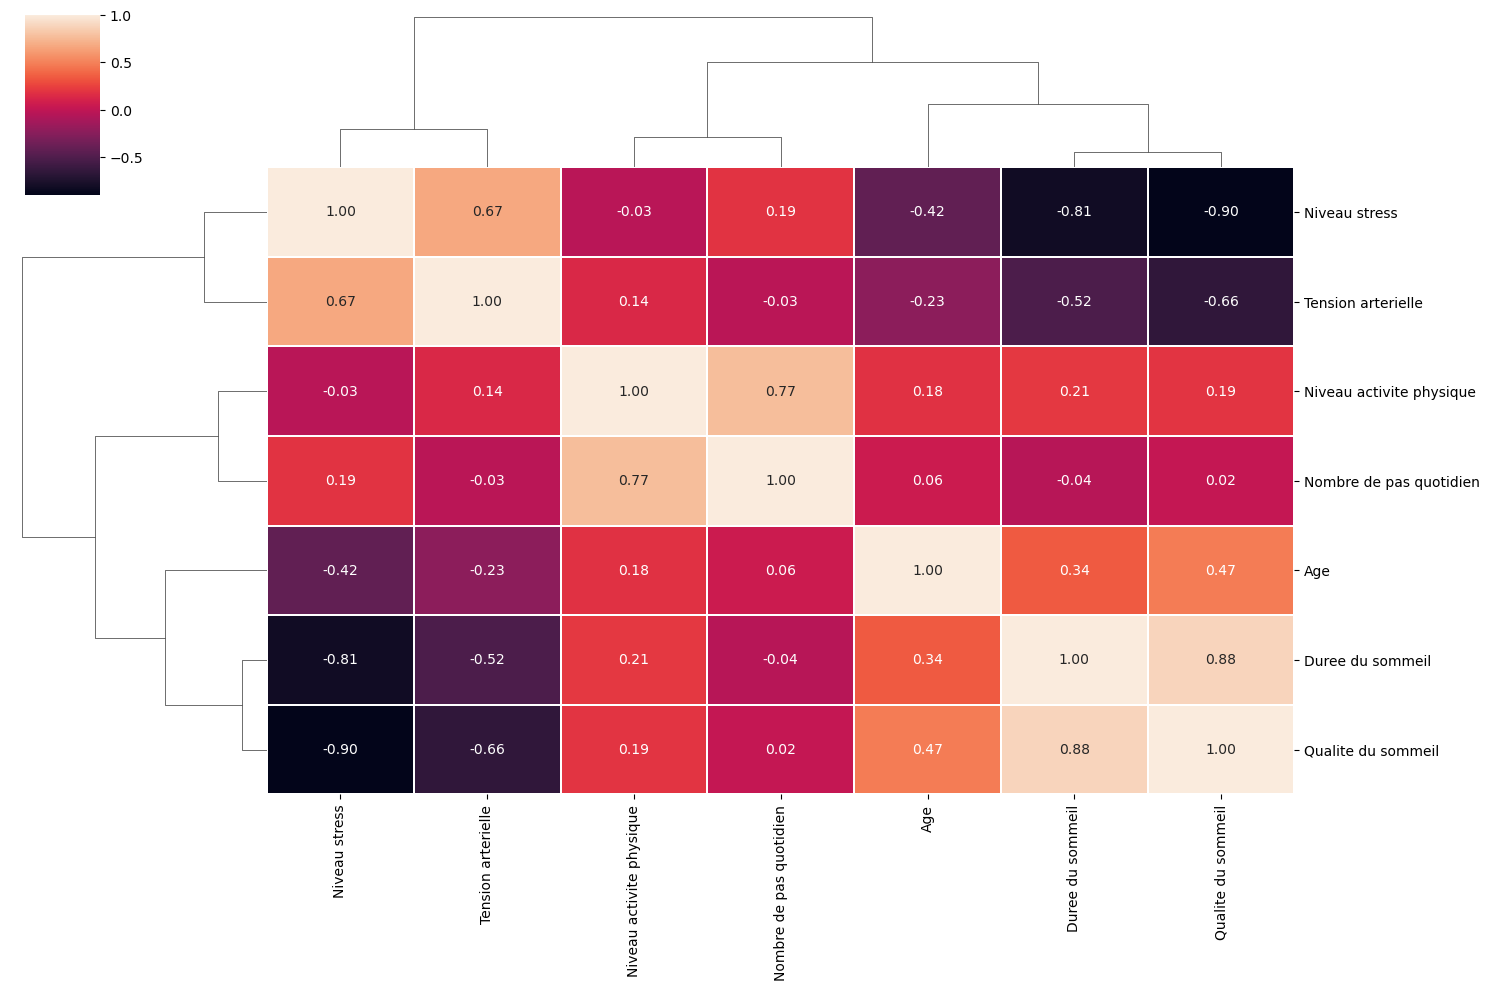

In [137]:
corr_mat = sns.clustermap(
    sommeil.select_dtypes(include=np.number).corr(),
    annot=True,
    linewidths=0.1,
    fmt=".2f",
    figsize=(15, 10),
)
corr_mat

Nous remarquons une forte corrélation :
* entre la qualité du sommeil et le niveau de stress
* entre la qualité du sommeil et la durée du sommeil
* entre  le niveau de stress et la durée du sommeil

### 2.1.2 Graphes des variables très corrélées

La matrice corrélation est un indicateur des relations entre les variables, on doit tracer les graphiques correspondant.

In [138]:
sommeil.columns

Index(['Identifiant', 'Genre', 'Age', 'Travail', 'Duree du sommeil',
       'Qualite du sommeil', 'Niveau activite physique', 'Niveau stress',
       'Categorie de IMC', 'Frequence cardiaque', 'Tension arterielle',
       'Nombre de pas quotidien', 'Trouble du sommeil'],
      dtype='object')

### 2.1.2.1 Qualité du sommeil et niveau de stress

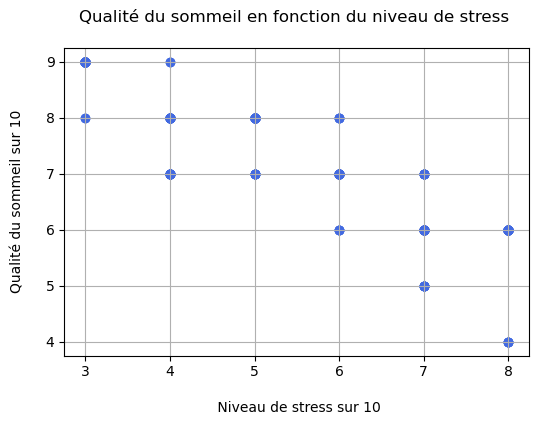

In [158]:
plt.figure(figsize=(6, 4))
sns.color_palette()
plt.scatter(x='Niveau stress', y='Qualite du sommeil',data=sommeil,color='royalblue')   # le tracé de l'histogramme

plt.title(
    "Qualité du sommeil en fonction du niveau de stress \n", fontsize=12
)
plt.ylabel("Qualité du sommeil sur 10\n", fontsize=10)
plt.xlabel("\n Niveau de stress sur 10", fontsize=10)
plt.grid()

### 2.1.2.2 Qualité du sommeil et temps de sommeil

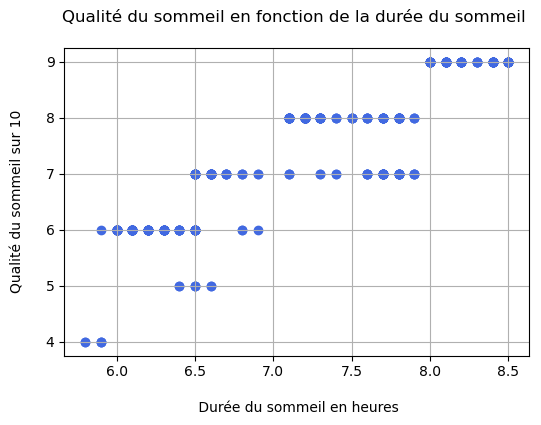

In [159]:
plt.figure(figsize=(6, 4))
plt.scatter(x='Duree du sommeil', y='Qualite du sommeil',data=sommeil,color='royalblue')   # le tracé de l'histogramme

plt.title(
    "Qualité du sommeil en fonction de la durée du sommeil \n", fontsize=12
)
plt.ylabel("Qualité du sommeil sur 10\n", fontsize=10)
plt.xlabel("\n Durée du sommeil en heures", fontsize=10)
plt.grid()

### Le niveau de stress et le temps de sommeil

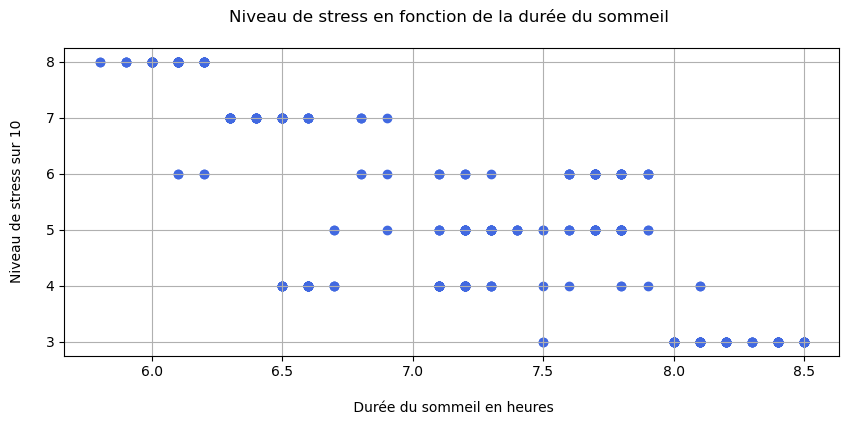

In [160]:
plt.figure(figsize=(10, 4))
plt.scatter(x='Duree du sommeil', y='Niveau stress',data=sommeil,color='royalblue')   # le tracé de l'histogramme

plt.title(
    "Niveau de stress en fonction de la durée du sommeil \n", fontsize=12
)
plt.ylabel("Niveau de stress sur 10\n", fontsize=10)
plt.xlabel("\n Durée du sommeil en heures", fontsize=10)
plt.grid()

## 2.2 Les autres facteurs non numériques sur la qualité du sommeil

Nous allons étudier tous les autres facteurs non numériques avec l'aide d'un heatmap

In [142]:
cols_objet

Index(['Identifiant', 'Genre', 'Travail', 'Categorie de IMC',
       'Frequence cardiaque', 'Trouble du sommeil'],
      dtype='object')

### 2.2.1 Qualité du sommeil et le genre

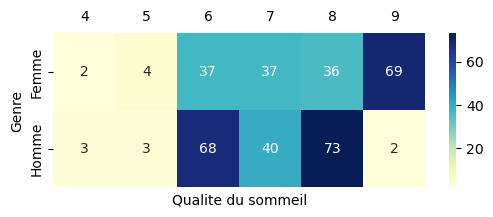

In [143]:
# tableau croisé entre cqualité du sommeil et le genre
heat1 = pd.crosstab(
    sommeil["Genre"], sommeil["Qualite du sommeil"]
)
plt.figure(figsize=(6, 2))
sns.heatmap(heat1, cmap="YlGnBu", annot=True)
plt.tick_params(
    axis="both",
    which="major",
    labelsize=10,
    labelbottom=False,
    bottom=False,
    top=False,
    labeltop=True,
)

### 2.2.2 Qualité du sommeil et catégorie de IMC

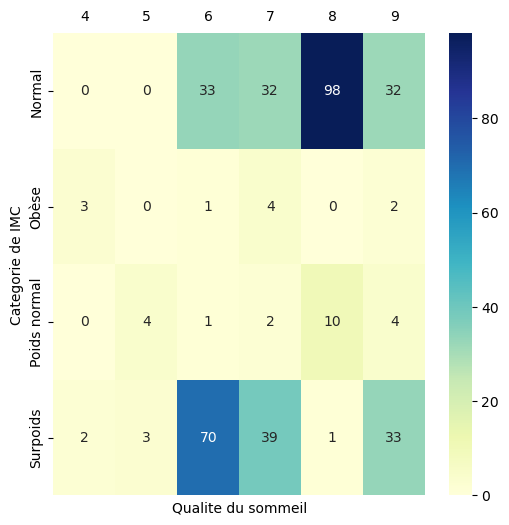

In [144]:
# tableau croisé entre qualité du sommeil et catégorie de IMC
heat3 = pd.crosstab(
    sommeil["Categorie de IMC"], sommeil["Qualite du sommeil"]
)
plt.figure(figsize=(6, 6))
sns.heatmap(heat3, cmap="YlGnBu", annot=True)
plt.tick_params(
    axis="both",
    which="major",
    labelsize=10,
    labelbottom=False,
    bottom=False,
    top=False,
    labeltop=True,
)

### 2.2.3 Qualité du sommeil et au travail

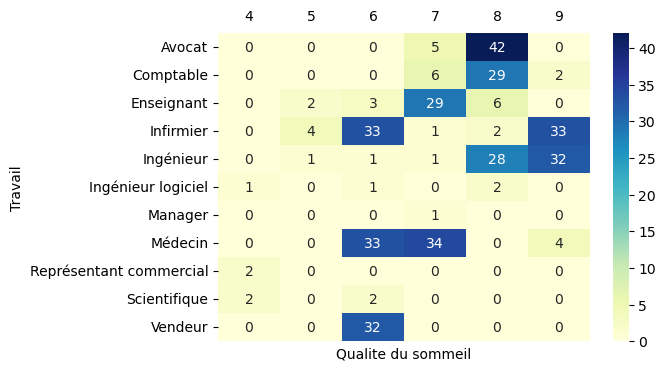

In [145]:
# tableau croisé entre qualité du sommeil et au travail
heat2 = pd.crosstab(
    sommeil["Travail"], sommeil["Qualite du sommeil"]
)
plt.figure(figsize=(6, 4))
sns.heatmap(heat2, cmap="YlGnBu", annot=True)
plt.tick_params(
    axis="both",
    which="major",
    labelsize=10,
    labelbottom=False,
    bottom=False,
    top=False,
    labeltop=True,
)

### 2.2.4 Qualité du sommeil et fréquence cardiaque

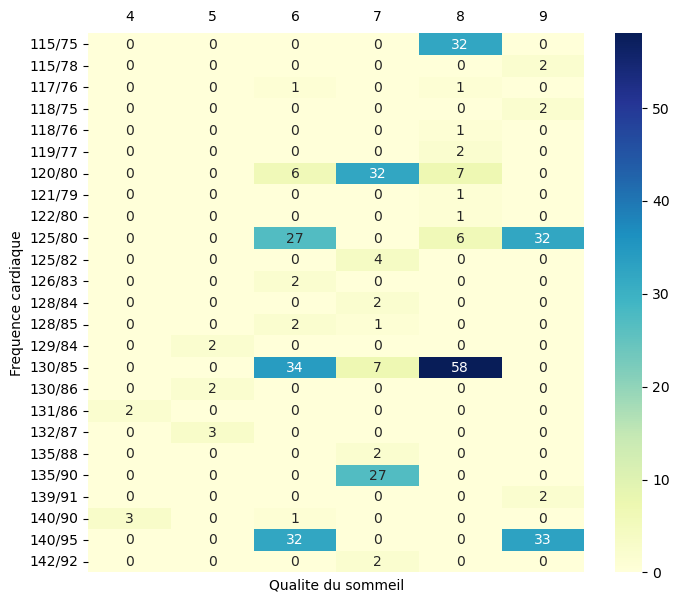

In [146]:
# tableau croisé entre qualité du sommeil et frequence cardiaque
heat4 = pd.crosstab(
    sommeil["Frequence cardiaque"], sommeil["Qualite du sommeil"]
)
plt.figure(figsize=(8, 7))
sns.heatmap(heat4, cmap="YlGnBu", annot=True)
plt.tick_params(
    axis="both",
    which="major",
    labelsize=10,
    labelbottom=False,
    bottom=False,
    top=False,
    labeltop=True,
)

### 2.2.5 La qualité du sommeil et les troubles du sommeil

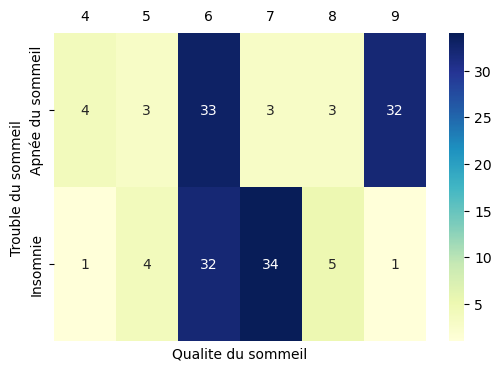

In [147]:
# tableau croisé entre qualité du sommeil et les troubles du sommeil
heat5 = pd.crosstab(
    sommeil["Trouble du sommeil"], sommeil["Qualite du sommeil"]
)
plt.figure(figsize=(6, 4))
sns.heatmap(heat5, cmap="YlGnBu", annot=True)
plt.tick_params(
    axis="both",
    which="major",
    labelsize=10,
    labelbottom=False,
    bottom=False,
    top=False,
    labeltop=True,
)